In [7]:
%matplotlib notebook
import subprocess
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:

d = '/home/jobasha/Documents/Dropbox/Repositories/planningfortransparency/utilities/create_grid_instance/grids/'
output_dir = '../results/'
output_file = 'results.txt'

In [ ]:
object_vector = []
fluent_vector = []
time_first_action_vector = []
time_average_vector = []
time_full_vector = []
average_ambiguity_vector = []
threshold_1_v = []
threshold_2_v = []
threshold_3_v = []

domain = d + "/domain.pddl"
count = 0

for problem_n in os.listdir(d):
    
    #print(problem_n)
    #try:
        if(not problem_n.startswith("problem")):
            continue
        count = 1 + count
        problem_file = d + problem_n
        numbers = problem_n.split('_')

        n = int(numbers[1])
        m = int(numbers[2])
        objects = n*m

        hype = d + "hype_" + str(n) + "_" + str(m) + ".dat"

        #print("\t" +problem_file)

        problem = problem_file
        goal_set = hype
        #max_nodes = "10"
        #df = "0.5"
        #max_s_nodes = "10"
        precision = "2"
        theta = "0.1"

        cmd = [".././PFT.x"]
        flags = [ domain, problem, goal_set,
        #    "-m", max_nodes,
        #    "-D", df,
        #    "-s", max_s_nodes,
        #    "-P", precision,
        #    "-t", theta,
            "-cm"]

        pipe = subprocess.Popen(
            cmd + flags,
            stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
        answer, stderr = pipe.communicate()
        #print(str(answer.decode()))
        resf = open(output_dir + problem_n + ".res", "w")
        resf.write(str(answer))
        resf.close()
        #print(answer)
        #print(stderr)
        lines = str(answer).split("\\n")[2:-1]
        #print(lines)

        actions = lines[0].split(",")[:-1]
        #print(actions)
        times = list(map(float,lines[1].split(",")[:-1]))
        #print(times)
        distances = list(map(float,lines[2].split(",")[:-1]))
        #print(distances)
        average_distance = sum(distances) / float(len(distances))

        prob_dists = []
        for line in lines[3:-6]:
            prob_dists += [list(map(float,line.split(",")[:-1]))]

        fluents = int(lines[-5])
        goal_index = int(lines[-6])
        threshold_3 = float(lines[-1])
        threshold_2 = float(lines[-2])
        threshold_1 = float(lines[-3])
        threshold_1_v.append(threshold_1)
        threshold_2_v.append(threshold_2)
        threshold_3_v.append(threshold_3)
        
        print(threshold_1, threshold_2, threshold_3)
        #prob_dists = prob_dists[:-2]
        n_l = 1/len(prob_dists)

        prob_dists = [[n_l] + prob_dists[x] for x in range(len(prob_dists))]
        actions = ["I"] + actions

        total_time = sum(times)
        average_time_per_action = sum(times) / float(len(times))
        time_first_action = times[0]

        print(str(count) + ". Problem - " + str(n) + "x" + str(m) + ", Cost: " + str(average_distance) + ", " + str(time_first_action) )

        object_vector.append(objects)
        time_first_action_vector.append(time_first_action)
        time_average_vector.append(average_time_per_action)
        time_full_vector.append(total_time)
        average_ambiguity_vector.append(average_distance)
        fluent_vector.append(fluents)
        
average_t_1 = sum(threshold_1_v) / len(threshold_1_v)
average_t_2 = sum(threshold_2_v) / len(threshold_2_v)
average_t_3 = sum(threshold_3_v) / len(threshold_3_v)

#         output_dir = '../results/'
#         output_file = 'online_n_blocks.txt'

#         file_out = open(output_dir + output_file , "a+")
#         file_out.write(problem)
#         file_out.write("\t")
#         file_out.write(str(total_time))
#         file_out.write("\t")
#         file_out.write(str(time_first_action))
#         file_out.write("\t")
#         file_out.write(str(average_time_per_action))
#         file_out.write("\t")
#         file_out.write(str(average_distance))
#         file_out.write("\n")
#         file_out.write(str(objects))
#         file_out.write("\n")

#         file_out.close()
#     except:
#         print("\t\tERROR FILE: " + str(n) + "x" + str(m))
#         print(answer)
#         continue
    
# print(object_vector)
# print(time_first_action_vector)

#     file_out = open(output_dir + output_file , "a+")
#     file_out.write(problem)
#     file_out.write("\t")
#     file_out.write(str(total_time))
#     file_out.write("\t")
#     file_out.write(str(time_first_action))
#     file_out.write("\t")
#     file_out.write(str(average_time_per_action))
#     file_out.write("\t")
#     file_out.write(str(average_distance))
#     file_out.write("\n")
#     file_out.write(objects)
#     file_out.write("\n")

#     file_out.close()



#             print("Actions: ")
#             print(actions)
#             print()
#             print("Times: ")
#             print(times)
#             print()
#             print("Distances: ")
#             print(distances)
#             print()
#             print("Probabilities: ")
#             print(prob_dists)





#             print(prob_dists)



#             plt.figure(2)

#             axes = plt.gca()
#             axes.set_ylim([0,1])
#             axes.set_xlabel('actions')
#             axes.set_ylabel('P(G | O)')
#             counter = 0
#             print(actions)
#             print(prob_dists[0])

#             for i in prob_dists:
#                 plt.plot(range(0, len(actions)), i, label=counter)
#                 counter += 1
#             #plt.xticks(range(0, len(actions)-1), actions)
#             plt.legend()

#             plt.figure(1)
#             ax = plt.axes(projection='3d')

#             ax.set_ylim([0,1])
#             ax.set_xlim([0,1])
#             ax.set_zlim([0,1])

#             ax.set_xlabel('P(G2 | O)')
#             ax.set_ylabel('P(G1 | O)')
#             ax.set_zlabel('P(G* | O)')

#             G_star = 0
#             G1 = 3
#             G2 = 4

#             r = range(len(prob_dists[0]))

#             p0 = [-prob_dists[G_star][x0] + prob_dists[G_star][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
#             p1 = [-prob_dists[G1][x0] + prob_dists[G1][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
#             p2 = [-prob_dists[G2][x0] + prob_dists[G2][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]

#             ax.plot(prob_dists[G1], prob_dists[G2], prob_dists[G_star], '-b')
#             ax.quiver(prob_dists[G1][:-1], prob_dists[G2][:-1],prob_dists[G_star][:-1],  p1, p2,p0, length=0.1, pivot='tail')

#             plt.show()

1.0 1.0 1.0
1. Problem - 6x11, Cost: 0.7164653076923077, 0.425915
1.0 1.0 1.0
2. Problem - 11x10, Cost: 0.7433407777777779, 1.04915
1.0 1.0 1.0
3. Problem - 3x13, Cost: 0.7103915454545453, 0.194847
1.0 1.0 1.0
4. Problem - 3x14, Cost: 0.7101178333333332, 0.221175
1.0 1.0 1.0
5. Problem - 10x5, Cost: 0.51898775, 0.093961
0.0 0.0 0.333333
6. Problem - 3x4, Cost: 0.06694594999999999, 0.003478
0.666667 0.777778 0.777778
7. Problem - 6x6, Cost: 0.5093784755555556, 0.201976
1.0 1.0 1.0
8. Problem - 6x13, Cost: 0.7164653076923077, 0.686059
1.0 1.0 1.0
9. Problem - 7x14, Cost: 0.8168207857142856, 0.799845
0.166667 1.0 1.0
10. Problem - 3x6, Cost: 0.35184466666666664, 0.082527
1.0 1.0 1.0
11. Problem - 3x11, Cost: 0.530616, 0.15313
1.0 1.0 1.0
12. Problem - 14x2, Cost: 0.7137727777777776, 0.106809
0.444444 1.0 1.0
13. Problem - 7x9, Cost: 0.4475186666666666, 0.466189
1.0 1.0 1.0
14. Problem - 11x12, Cost: 0.7538398235294119, 1.39372
1.0 1.0 1.0
15. Problem - 13x3, Cost: 0.7090951428571427, 0.19

<IPython.core.display.Javascript object>


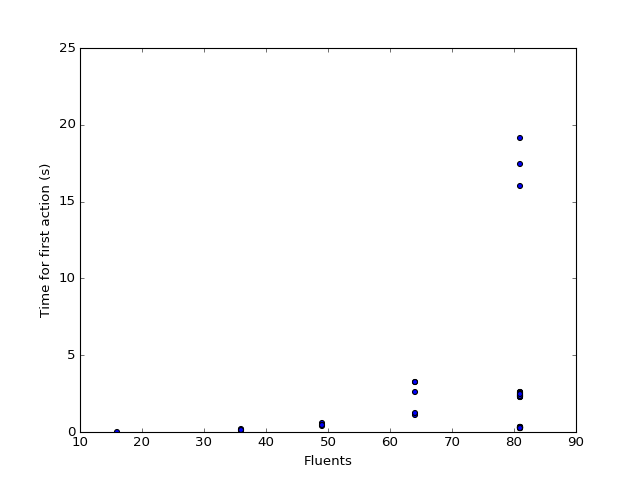

64



In [6]:
plt.figure(5)
plt.ylim([0,25])

plt.xlabel('Fluents')
plt.ylabel('Time for first action (s)')
av = list(map(abs, average_ambiguity_vector))
ob = object_vector
tf = time_first_action_vector
ta = time_average_vector
tfu = time_full_vector
print(fluent_vector[4])
print()

plt.scatter(fluent_vector, time_first_action_vector)

In [ ]:

domain = d + "domain.pddl"
count = 0
object_vector_l = []
time_first_action_vector_l = []


for problem_n in os.listdir(d):
#     print(problem_n)
    try:
        if(not problem_n.startswith("problem")):
            continue

        problem_file = d + problem_n
        numbers = problem_n.split('_')

        n = int(numbers[1])
        m = int(numbers[2])
        objects = n


        hype = d + "hype_" + str(n) + "_" + str(m) + ".dat"

    #     print("\t" +problem_file)

        problem = problem_file

        cmd = ["time", "python"]
        flags = [ "/home/jobasha/Documents/PhD/Planners/FastDownward/fast-downward.py","--alias", "seq-sat-lama-2011", domain, problem]

        pipe = subprocess.Popen(
            cmd + flags,
            stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        #print(''.join(pipe.stderr.readlines()))
        answer, stderr = pipe.communicate()
        answer1 = str(stderr).split("\'")
        answer2 = answer1[1].split("system")
        time_taken = sum(list(map(float, answer2[0].split("user"))))


        file = open("sas_plan.1","r")
        counter = 0
        for lines in file :
            counter = counter + 1

        print("Problem - " + str(n) + "x" + str(m) + ", Cost: " + str(counter) + ", " + str(time_taken) )
        os.remove("sas_plan.1")
        os.remove("output")
        os.remove("output.sas")

        if(counter != 1):
            time_first_action_vector_l.append(time_taken)
            object_vector_l.append(objects)
    except:
        print("\t\tERROR FILE: " + str(n) + "x" + str(m))
        #print(answer)

        continue
        
# object_vector = []
# time_first_action_vector = []
# time_average_vector = []
# time_full_vector = []
# average_ambiguity_vector = []

# domain = d + "/domain.pddl"
# count = 0

# for problem_n in os.listdir(d):
    
#     #print(problem_n)
# #     try:
#     if(not problem_n.startswith("problem")):
#         continue
#     count = 1 + count
#     problem_file = d + problem_n
#     numbers = problem_n.split('_')

#     n = int(numbers[1])
#     m = int(numbers[2])
#     objects = n*m

#     hype = d + "hype_" + str(n) + "_" + str(m) + ".dat"

#     #print("\t" +problem_file)

#     problem = problem_file
#     goal_set = hype
#     #max_nodes = "10"
#     #df = "0.5"
#     #max_s_nodes = "10"
#     precision = "2"

#     cmd = ["./PFT.x"]
#     flags = [ domain, problem, goal_set,
#     #    "-m", max_nodes,
#     #    "-D", df,
#     #    "-s", max_s_nodes,
#     #    "-P", precision,
#         "-cO"]

#     pipe = subprocess.Popen(
#         cmd + flags,
#         stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
#     answer, stderr = pipe.communicate()
# #     print(answer)


#     lines = str(answer).split("\\n")[2:-1]
#     actions = lines[0].split(",")[:-1]
#     times = list(map(float,lines[1].split(",")[:-1]))
#     distances = list(map(float,lines[2].split(",")[:-1]))
#     average_distance = sum(distances) / float(len(distances))

#     prob_dists = []
#     for line in lines[3:]:
#         prob_dists += [list(map(float,line.split(",")[:-1]))]

#     prob_dists = prob_dists[:-1]
#     n_l = 1/len(prob_dists)
#     prob_dists = [[n_l] + prob_dists[x] for x in range(len(prob_dists))]
#     actions = ["I"] + actions

#     total_time = sum(times)
#     average_time_per_action = sum(times) / float(len(times))
#     time_first_action = times[0]

#     print(str(count) + ". Problem - " + str(n) + "x" + str(m) + ", Cost: " + str(average_distance) + ", " + str(time_first_action) )



#     object_vector.append(objects)
#     time_first_action_vector.append(time_first_action)
#     time_average_vector.append(average_time_per_action)
#     time_full_vector.append(total_time)
#     average_ambiguity_vector.append(average_distance)
    
#     output_dir = 'results/'
#     output_file = 'online_grid.txt'

#     file_out = open(output_dir + output_file , "a+")
#     file_out.write(problem)
#     file_out.write("\t")
#     file_out.write(str(total_time))
#     file_out.write("\t")
#     file_out.write(str(time_first_action))
#     file_out.write("\t")
#     file_out.write(str(average_time_per_action))
#     file_out.write("\t")
#     file_out.write(str(average_distance))
#     file_out.write("\n")
#     file_out.write(str(objects))
#     file_out.write("\n")

#     file_out.close()
# #     except:
# #         print("\t\tERROR FILE: " + str(n) + "x" + str(m))
# #         continue
    
# # print(object_vector)
# # print(time_first_action_vector)

# #     file_out = open(output_dir + output_file , "a+")
# #     file_out.write(problem)
# #     file_out.write("\t")
# #     file_out.write(str(total_time))
# #     file_out.write("\t")
# #     file_out.write(str(time_first_action))
# #     file_out.write("\t")
# #     file_out.write(str(average_time_per_action))
# #     file_out.write("\t")
# #     file_out.write(str(average_distance))
# #     file_out.write("\n")
# #     file_out.write(objects)
# #     file_out.write("\n")

# #     file_out.close()



# #             print("Actions: ")
# #             print(actions)
# #             print()
# #             print("Times: ")
# #             print(times)
# #             print()
# #             print("Distances: ")
# #             print(distances)
# #             print()
# #             print("Probabilities: ")
# #             print(prob_dists)





# #             print(prob_dists)



# #             plt.figure(2)

# #             axes = plt.gca()
# #             axes.set_ylim([0,1])
# #             axes.set_xlabel('actions')
# #             axes.set_ylabel('P(G | O)')
# #             counter = 0
# #             print(actions)
# #             print(prob_dists[0])

# #             for i in prob_dists:
# #                 plt.plot(range(0, len(actions)), i, label=counter)
# #                 counter += 1
# #             #plt.xticks(range(0, len(actions)-1), actions)
# #             plt.legend()

# #             plt.figure(1)
# #             ax = plt.axes(projection='3d')

# #             ax.set_ylim([0,1])
# #             ax.set_xlim([0,1])
# #             ax.set_zlim([0,1])

# #             ax.set_xlabel('P(G2 | O)')
# #             ax.set_ylabel('P(G1 | O)')
# #             ax.set_zlabel('P(G* | O)')

# #             G_star = 0
# #             G1 = 3
# #             G2 = 4

# #             r = range(len(prob_dists[0]))

# #             p0 = [-prob_dists[G_star][x0] + prob_dists[G_star][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
# #             p1 = [-prob_dists[G1][x0] + prob_dists[G1][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]
# #             p2 = [-prob_dists[G2][x0] + prob_dists[G2][x1] for x0 in list(r) for x1 in list(r) if x0 + 1  == x1]

# #             ax.plot(prob_dists[G1], prob_dists[G2], prob_dists[G_star], '-b')
# #             ax.quiver(prob_dists[G1][:-1], prob_dists[G2][:-1],prob_dists[G_star][:-1],  p1, p2,p0, length=0.1, pivot='tail')

# #             plt.show()

In [ ]:
fluents_l = list(map(lambda x: ((x+1)**2), object_vector_l))
plt.figure(10)
plt.ylim([0,25])
plt.xlim([10,90])
plt.xlabel('Objects')
plt.ylabel('Time (sec)')
#av_o = list(map(abs, average_ambiguity_vector))
plt.scatter(fluents_l, time_first_action_vector_l)


In [ ]:
object_vector_l = []
time_first_action_vector_l = []
domain = d + "domain.pddl"

for problem_n in os.listdir(d):
#     print(problem_n)
#     try:
    if(not problem_n.startswith("problem")):
        continue

    problem_file = d + problem_n
    numbers = problem_n.split('_')

    n = int(numbers[1])
    m = int(numbers[2])
    objects = n*m
    

    hype = d + "hype_" + str(n) + "_" + str(m) + ".dat"

#     print("\t" +problem_file)

    problem = problem_file

    cmd = ["python"]
    flags = [ "/home/jobasha/Documents/PhD/Planners/FastDownward/fast-downward.py","--alias", "seq-sat-lama-2011", domain, problem]

    start = time.clock()
    subprocess.call(cmd + flags)
    end = time.clock()
    
    file = open("sas_plan.1","r")
    counter = 0
    for lines in file :
        counter = counter + 1
    
    print("Problem - " + str(n) + "x" + str(m) + ", Cost: " + str(counter) + ", " + str(end - start) )
    os.remove("sas_plan.1")
    os.remove("output")
    os.remove("output.sas")
        
    if(counter != 1):
        time_first_action_vector_l.append(end - start)
        object_vector_l.append(objects)


        
        

#     except:

#         continue

In [ ]:
plt.figure(3)
plt.scatter(object_vector_l, time_first_action_vector_l)
